In [42]:
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")

from scipy.stats import percentileofscore
from scipy import stats

import pymc3 as pm
import arviz as az

# pd.set_option('display.max_columns', None)

from utils import *

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
import scipy.stats as scs
from scipy.stats import norm
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

In [44]:
data = pd.read_excel('data/bet_awards_modfile_FINAL_08.05.2021.xlsx')
data.head()

,dma_code,cplx_imp_i,smsn_imp_i,spot_imp_i,vzio_imp_i,tw_imp_i,fb_imp_i,yt_imp_i,tv_exp_i,tune_in_i
0,500.0,0.008422,0.015025,0.212211,0.013772,0.348791,0.023189,0.119566,0.005713,2.0
1,501.0,0.016431,0.036270,0.225445,0.007491,0.369489,0.046153,0.184742,0.010343,4.0
2,502.0,0.006553,0.015509,0.178028,0.011686,0.344432,0.037104,0.141722,0.008395,2.0
3,503.0,0.010626,0.017485,0.119478,0.013206,0.353738,0.095669,0.236077,0.022665,2.0
4,504.0,0.016560,0.025442,0.204707,0.010759,0.370823,0.046618,0.321395,0.015143,4.0


In [45]:
# checking for Nan values in columns
data.isna().sum().sum()

0

In [46]:
data.describe()

,dma_code,cplx_imp_i,smsn_imp_i,spot_imp_i,vzio_imp_i,tw_imp_i,fb_imp_i,yt_imp_i,tv_exp_i,tune_in_i
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,641.104762,0.008516,0.021490,0.180836,0.013638,0.352482,0.050132,0.175388,0.010169,1.942857
std,100.375079,0.003937,0.008625,0.052792,0.009866,0.010691,0.018990,0.059557,0.004788,0.991143
min,500.000000,0.001626,0.008018,0.074963,0.007491,0.334246,0.000000,0.071617,0.001961,0.000000
25%,552.250000,0.005782,0.015603,0.147842,0.011492,0.344670,0.037052,0.138629,0.006756,1.000000
50%,627.500000,0.007491,0.020142,0.172508,0.012958,0.350286,0.046479,0.161186,0.009065,2.000000
75%,723.500000,0.010398,0.025903,0.211144,0.014160,0.357436,0.057383,0.195522,0.011949,3.000000
max,881.000000,0.022324,0.058665,0.368853,0.150939,0.401953,0.139827,0.434015,0.024520,4.000000


In [47]:
# Distribution of the target variable
df = pd.DataFrame(data.tune_in_i.value_counts()).reset_index().rename(columns={'tune_in_i':'count', 'index':'tune_in_i'}).set_index('tune_in_i')

In [48]:
df.index

Float64Index([               1.0,                2.0,                3.0,
                             4.0, 2.9999999999999996, 3.0000000000000004,
              3.9999999999999996,                0.0],
             dtype='float64', name='tune_in_i')

In [49]:
data.tune_in_i.value_counts().index

Float64Index([               1.0,                2.0,                3.0,
                             4.0, 2.9999999999999996, 3.0000000000000004,
              3.9999999999999996,                0.0],
             dtype='float64')

In [31]:
data.tune_in_i =  data.tune_in_i.astype(int)

In [50]:
# Distribution of the target variable

pd.DataFrame(data.tune_in_i.value_counts()).reset_index().rename(columns={'tune_in_i':'count', 'index':'tune_in_i'}).set_index('tune_in_i')

,count
tune_in_i,
1.0,84
2.0,67
3.0,17
4.0,15
3.0,13
3.0,8
4.0,4
0.0,2


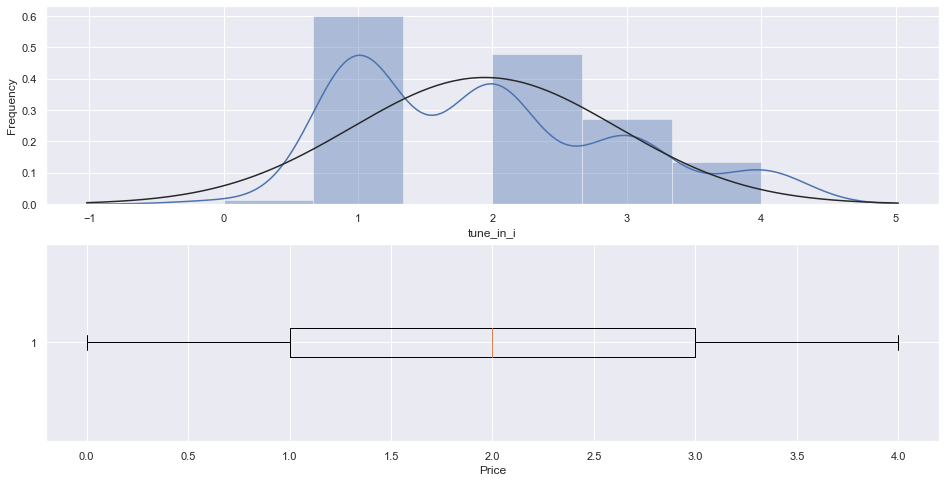

In [7]:
target_distribution(data.tune_in_i)

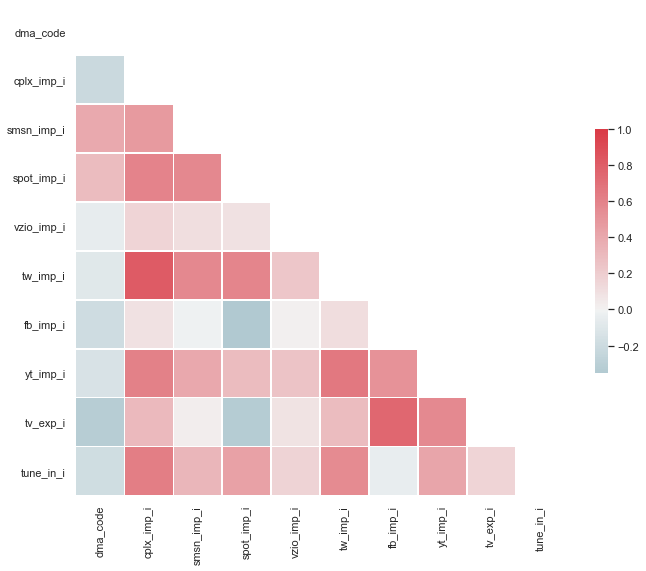

Based on threshold 0.8 , sugested featrures to drop - ['tw_imp_i']


In [8]:
features_corr_matrix(data, 0.8)

### Relationship with target variable

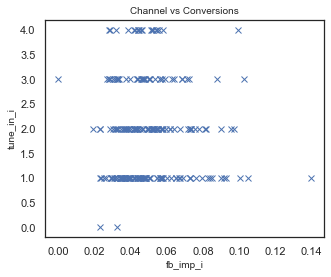

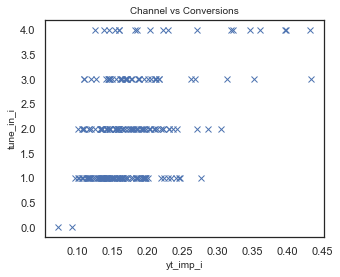

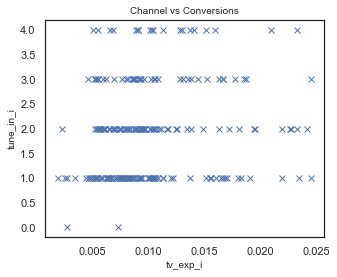

In [12]:
plot_relationship(data.iloc[:,-4:], 'tune_in_i')

In [13]:
train_test_valid(data.iloc[:,:-1], data['tune_in_i'])

Training: RMSE 0 vs. Testing: RMSE 0
Perfomance : 27 %
